# Empirical Analysis
## Importing the Data
We first retrieve the data from Quandl.

In [1]:
import pandas as pd
import os
import quandl
import time
import warnings
warnings.filterwarnings('ignore')

quandl_token = os.environ['QUANDL_TOKEN']

data = quandl.get("ECB/EURUSD", trim_start = "2018-01-01", trim_end = "2019-04-01", authtoken=quandl_token)

In [2]:
data.info()

data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 319 entries, 2018-01-02 to 2019-04-01
Data columns (total 1 columns):
Value    319 non-null float64
dtypes: float64(1)
memory usage: 5.0 KB


,Value
Date,
2018-01-02,1.2065
2018-01-03,1.2023
2018-01-04,1.2065
2018-01-05,1.2045
2018-01-08,1.1973


## Plotting the data

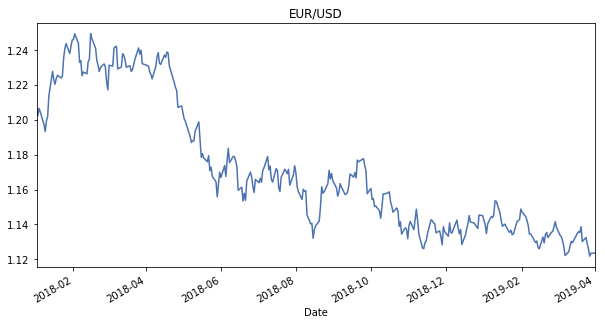

In [3]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

data['Value'].plot(title="EUR/USD", figsize=(10,5))
plt.show()

## First-order differencing

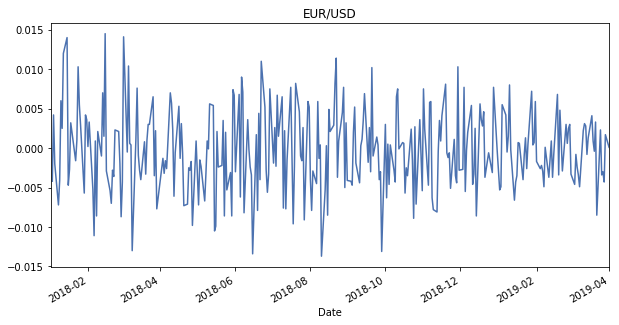

In [4]:
diff = data['Value'].diff()
diff.plot(title="EUR/USD", figsize=(10,5))
plt.show()

We can plot the distribution.

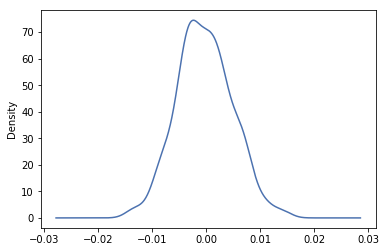

In [5]:
diff.plot(kind='kde')
plt.show()

## Descriptive statistics

In [6]:
diff.describe()

count    318.000000
mean      -0.000261
std        0.005101
min       -0.013700
25%       -0.003575
50%       -0.000500
75%        0.003000
max        0.014500
Name: Value, dtype: float64

## Kurtosis

In [7]:
from scipy.stats import describe

diff.kurt()

0.0006551586020941969

## Skewness

In [8]:
diff.skew()

0.13879907274353626

## Q-Q plot

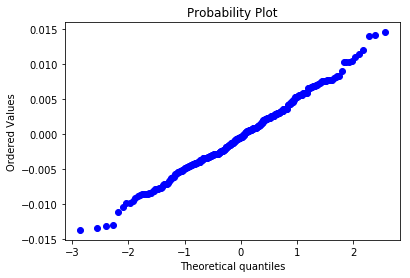

In [9]:
from scipy.stats import probplot
import pylab

probplot(diff, dist="norm", plot=pylab)
pylab.show()

In [10]:
from statsmodels.stats.stattools import durbin_watson

# ARCH and GARCH models

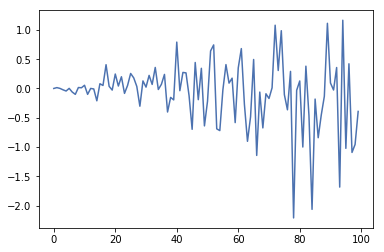

In [11]:
from random import gauss
from random import seed
from matplotlib import pyplot

seed(1)

data = [gauss(0, i*0.01) for i in range(0,100)]

pyplot.plot(data)
pyplot.show()